In [1]:
# -*- coding:utf-8 -*
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tkinter as tk
from math import pi, cos, sin
from PIL import Image,ImageTk
import numpy as np
from scipy.ndimage import zoom
def outimg(input, angle, r0=0,r1=0,r2=0, k=2, top=True,rotate=0):
    
   
    org = input
    
   
    h, w, d = org.shape # 输入图像的高度、宽度和通道数
    org = zoom(org, ((r2-r1)/h, 1, 1), order=0)
    h, w, d = org.shape # 输入图像的高度、宽度和通道数
    # ht=int(h*(r2-r1)/r1)
    # tem=np.zeros((ht,w,d),dtype=np.uint8)
    # org=np.append(org,tem,axis=0)
    if r0 > 0: # 输出环形的话，图像上部增加白色背景
        bg = np.ones((r0, w, d), dtype=np.uint8)
        org = np.append(bg, org, axis=0) if top else np.append(org, bg, axis=0)
    
    h, w, d = org.shape # 加上背景后图像的高度、宽度和通道数
    r = 2*r2  # 输出图像高度和宽度
    im_fan = np.zeros((r, r, d), dtype=np.uint8) # 生成输出图像的numpy数组（全透明）
    
    idx = np.arange(r1,r2) 
    alpha = np.radians(np.linspace(-angle/2, angle/2, k*w)) # 生成扇形角度序列
    for i in range(k*w): # 遍历输入图像的每一列
        rows = np.int32(np.ceil(np.cos(alpha[i])*idx)) + r//2
        cols = np.int32(np.ceil(np.sin(alpha[i])*idx)) + r//2
        # print(rows)
        # print(cols)
        # print(im_fan[(rows, cols)])
        im_fan[(rows, cols)] = org[:,i//k][0:(r2-r1)]
    
    if 360 > angle > 180: # 裁切输出图像上部的空白区域
        im_fan = im_fan[int(h*(1-np.sin(np.radians((angle/2-90))))):]
    
    if not top:
        im_fan = im_fan[::-1]
    return im_fan


# im_pil = Image.open('./input/test.png') 
# im = np.array(im_pil) 
# im=outimg(im,angle=90, r0=1,r1=50,r2=150, k=200, top=False)
# print(im[0,0,0])
# image = Image.fromarray((im).astype('uint8'), 'RGB')
# root = tk.Tk()
# canvas = tk.Canvas(root, width=im.shape[1], height=im.shape[0])
# canvas.pack()
# photo = ImageTk.PhotoImage(image)
# canvas.create_image(0, 0, image=photo, anchor='nw')
# root.mainloop()

D:\Users\15654\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

height=400
weigth=400

def draw_annulus_inner_radius(*args):
    global canvas
    global im
    global photo
    global image
    canvas.delete("all")
    if outer_radius.get()>inner_radius.get():
        draw_annulus(inner_radius.get(), outer_radius.get(), angle.get())
        image=outimg(im,angle=angle.get(), r0=1,r1=int(inner_radius.get()),r2=int(outer_radius.get()), k=200, top=False)
        image=Image.fromarray(image)
        photo=ImageTk.PhotoImage(image)
        canvas.create_image(400, 20, anchor='nw', image=photo)

def draw_annulus_outer_radius(*args):
    global canvas
    global im
    global photo
    global image
    canvas.delete("all")
    if outer_radius.get()>inner_radius.get():
        draw_annulus(inner_radius.get(), outer_radius.get(), angle.get())
        image=outimg(im,angle=angle.get(), r0=1,r1=int(inner_radius.get()),r2=int(outer_radius.get()), k=200, top=False)
        image=Image.fromarray(image)
        photo=ImageTk.PhotoImage(image)
        canvas.create_image(400, 20, anchor='nw', image=photo)


def draw_annulus_angle(*args):
    global canvas
    global im
    global photo
    global image
    canvas.delete("all")
    if outer_radius.get()>inner_radius.get():
        draw_annulus(inner_radius.get(), outer_radius.get(), angle.get())
        image=outimg(im,angle=angle.get(), r0=1,r1=int(inner_radius.get()),r2=int(outer_radius.get()), k=200, top=False)
        image=Image.fromarray(image)
        
        photo=ImageTk.PhotoImage(image)
        canvas.create_image(400, 20, anchor='nw', image=photo)


def draw_annulus(inner_radius, outer_radius, angle):
    start_angle = 0
    if angle!=360:
        canvas.create_arc(height/2-outer_radius, weigth/2-outer_radius, height/2+outer_radius, weigth/2+outer_radius, start=90-angle/2 , extent=angle,style='arc', fill='', outline='black')
        canvas.create_arc(height/2-inner_radius, weigth/2-inner_radius, height/2+inner_radius, weigth/2+inner_radius, start=90-angle/2 , extent=angle,style='arc', fill='', outline='black')
        x1=int(height/2+inner_radius*cos(-(90-angle/2)*pi/180))
        y1=int(weigth/2+inner_radius*sin(-(90-angle/2)*pi/180))
        x2=int(height/2+outer_radius*cos(-(90-angle/2)*pi/180))
        y2=int(weigth/2+outer_radius*sin(-(90-angle/2)*pi/180))

        x3=int(height/2+inner_radius*cos(-(90+angle/2)*pi/180))
        y3=int(weigth/2+inner_radius*sin(-(90+angle/2)*pi/180))
        x4=int(height/2+outer_radius*cos(-(90+angle/2)*pi/180))
        y4=int(weigth/2+outer_radius*sin(-(90+angle/2)*pi/180))
        canvas.create_line(x1, y1, x2, y2, fill='black')
        canvas.create_line(x3, y3, x4, y4, fill='black')
    else:
        canvas.create_oval(height/2-outer_radius, weigth/2-outer_radius, height/2+outer_radius, weigth/2+outer_radius, fill='', outline='black')
        canvas.create_oval(height/2-inner_radius, weigth/2-inner_radius, height/2+inner_radius, weigth/2+inner_radius, fill='', outline='black')
    
   


root = tk.Tk()
root.title("扇环控制")


canvas = tk.Canvas(root, width=weigth*2, height=height, bg='white')
canvas.pack()

inner_radius = tk.DoubleVar(value=50)
outer_radius = tk.DoubleVar(value=150)
angle = tk.DoubleVar(value=90)

im_pil = Image.open('./input/demo.jpg') 
im = np.array(im_pil) 
image=outimg(im,angle=90, r0=1,r1=50,r2=150, k=200, top=False)
print(np.max(image))
image=Image.fromarray(image)
photo=ImageTk.PhotoImage(image)
canvas.create_image(400, 20, anchor='nw', image=photo)



inner_scroll = tk.Scale(root, from_=0, to=weigth/2, orient='horizontal', variable=inner_radius, command=draw_annulus_inner_radius,resolution=1)
inner_scroll.pack()

outer_scroll = tk.Scale(root, from_=0, to=height/2, orient='horizontal', variable=outer_radius, command=draw_annulus_outer_radius,resolution=1)
outer_scroll.pack()

angle_scroll = tk.Scale(root, from_=0, to=360, orient='horizontal', variable=angle, command=draw_annulus_angle)
angle_scroll.pack()

draw_annulus(inner_radius.get(), outer_radius.get(), angle.get())

root.mainloop()

255


侧脸转正脸

In [2]:
import cv2
import numpy as np
import math
from collections import defaultdict
from PIL import Image,ImageDraw
from matplotlib.pyplot import imshow
%matplotlib inline
import matplotlib.pyplot as plt
import face_recognition 

In [14]:
img_name = '1.webp'
image_array = cv2.imread(img_name)
Image.fromarray(image_array)
face_landmarks_list = face_recognition.face_landmarks(image_array, model="large")
face_landmarks_dict = face_landmarks_list[0]
print(face_landmarks_dict, end=" ")

{'chin': [(77, 102), (74, 115), (72, 128), (71, 142), (73, 154), (80, 165), (90, 174), (101, 183), (114, 188), (126, 189), (136, 183), (145, 177), (152, 168), (158, 159), (163, 149), (167, 139), (169, 129)], 'left_eyebrow': [(94, 93), (103, 90), (113, 90), (122, 94), (129, 101)], 'right_eyebrow': [(147, 106), (154, 104), (161, 105), (168, 108), (171, 114)], 'nose_bridge': [(136, 113), (135, 121), (134, 129), (133, 137)], 'nose_tip': [(119, 137), (124, 140), (128, 144), (133, 144), (136, 144)], 'left_eye': [(103, 105), (109, 104), (115, 107), (119, 111), (113, 110), (107, 108)], 'right_eye': [(146, 119), (152, 117), (157, 119), (161, 123), (156, 122), (151, 121)], 'top_lip': [(99, 146), (109, 144), (119, 145), (125, 148), (131, 148), (138, 152), (142, 159), (139, 158), (130, 154), (124, 153), (118, 151), (101, 147)], 'bottom_lip': [(142, 159), (135, 167), (127, 169), (120, 168), (113, 165), (105, 158), (99, 146), (101, 147), (115, 158), (122, 161), (128, 162), (139, 158)]} 

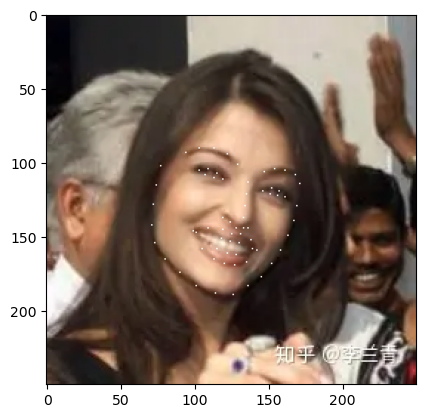

In [15]:
def visualize_landmark(image_array, landmarks):
    origin_img = Image.fromarray(image_array)
    draw = ImageDraw.Draw(origin_img)
    for facial_feature in landmarks.keys():
        draw.point(landmarks[facial_feature])
    imshow(origin_img)
visualize_landmark(image_array=image_array,landmarks=face_landmarks_dict)
plt.show()


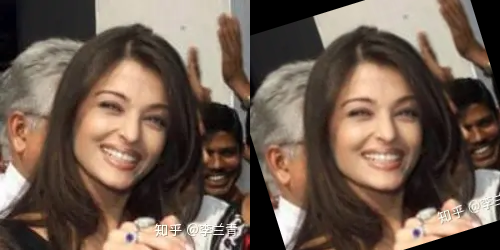

In [16]:
def align_face(image_array, landmarks):
    # get list landmarks of left and right eye
    left_eye = landmarks['left_eye']
    right_eye = landmarks['right_eye']
    # calculate the mean point of landmarks of left and right eye
    left_eye_center = np.mean(left_eye, axis=0).astype("int")
    right_eye_center = np.mean(right_eye, axis=0).astype("int")
    # compute the angle between the eye centroids
    dy = right_eye_center[1] - left_eye_center[1]
    dx = right_eye_center[0] - left_eye_center[0]
    # compute angle between the line of 2 centeroids and the horizontal line
    angle = math.atan2(dy, dx) * 180. / math.pi
    # calculate the center of 2 eyes
    eye_center = (int((left_eye_center[0] + right_eye_center[0]) // 2),
                  int((left_eye_center[1] + right_eye_center[1]) // 2))
    # at the eye_center, rotate the image by the angle
    rotate_matrix = cv2.getRotationMatrix2D(eye_center, angle, scale=1)
    rotated_img = cv2.warpAffine(image_array, rotate_matrix, (image_array.shape[1], image_array.shape[0]))
    return rotated_img, eye_center, angle

aligned_face, eye_center, angle = align_face(image_array=image_array, landmarks=face_landmarks_dict)
Image.fromarray(np.hstack((image_array,aligned_face)))

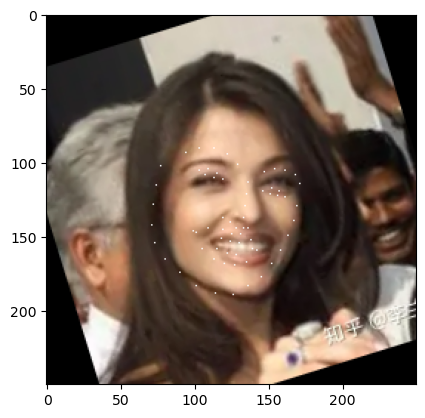

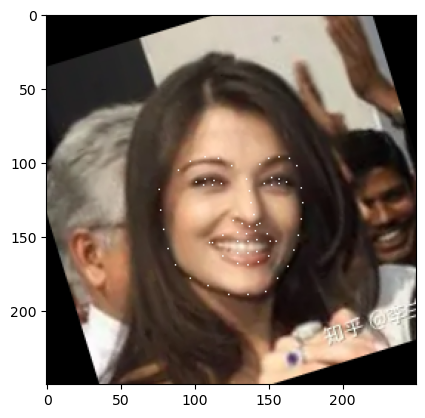

In [17]:
visualize_landmark(image_array=aligned_face,landmarks=face_landmarks_dict)
plt.show()
def rotate(origin, point, angle, row):
    x1, y1 = point
    x2, y2 = origin
    y1 = row - y1
    y2 = row - y2
    angle = math.radians(angle)
    x = x2 + math.cos(angle) * (x1 - x2) - math.sin(angle) * (y1 - y2)
    y = y2 + math.sin(angle) * (x1 - x2) + math.cos(angle) * (y1 - y2)
    y = row - y
    return int(x), int(y)
def rotate_landmarks(landmarks, eye_center, angle, row):
    rotated_landmarks = defaultdict(list)
    for facial_feature in landmarks.keys():
        for landmark in landmarks[facial_feature]:
            rotated_landmark = rotate(origin=eye_center, point=landmark, angle=angle, row=row)
            rotated_landmarks[facial_feature].append(rotated_landmark)
    return rotated_landmarks
rotated_landmarks = rotate_landmarks(landmarks=face_landmarks_dict,
                                         eye_center=eye_center, angle=angle, row=image_array.shape[0])
visualize_landmark(image_array=aligned_face,landmarks=rotated_landmarks)
plt.show()

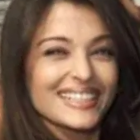

In [18]:
def corp_face(image_array, size, landmarks):
    x_min = np.min(landmarks['chin'], axis=0)[0]
    x_max = np.max(landmarks['chin'], axis=0)[0]
    x_center = (x_max - x_min) / 2 + x_min
    left, right = (x_center - size / 2, x_center + size / 2)

    eye_landmark = landmarks['left_eye'] + landmarks['right_eye']
    eye_center = np.mean(eye_landmark, axis=0).astype("int")
    lip_landmark = landmarks['top_lip'] + landmarks['bottom+lip']
    lip_center = np.mean(lip_landmark, axis=0).astype("int")
    mid_part = lip_center[1] - eye_center[1]
    top, bottom = eye_center[1] - (size - mid_part) / 2, lip_center[1] + (size - mid_part) / 2

    pil_img = Image.fromarray(image_array)
    left, top, right, bottom = [int(i) for i in [left, top, right, bottom]]
    cropped_img = pil_img.crop((left, top, right, bottom))
    cropped_img = np.array(cropped_img)
    return cropped_img, left, top
cropped_face, left, top = corp_face(image_array=aligned_face, size=140, landmarks=rotated_landmarks)
Image.fromarray(cropped_face)